In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

In [32]:
######Importing data
import pandas as pd
df= pd.read_csv(r"C:\Users\edmun\Desktop\Prof. Kakraba\Mental Health Paper\Mental Health Survey.csv")

# Print the descriptive statistics
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [34]:
print(df.shape)
print(df.describe())
print(df.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

# Drop 'comments', 'state' and 'Timestamp'

In [37]:
df.drop(['comments'], axis= 1, inplace=True)
df.drop(['state'], axis= 1, inplace=True)
df.drop(['Timestamp'], axis= 1, inplace=True)
df.drop(['Country'], axis= 1, inplace=True)

In [39]:
df.isnull().sum().max() #just checking that there's no missing data missing...
df.tail(5)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
1254,26,male,No,No,Yes,NaN,26-100,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,No,No,No,NaN,100-500,Yes,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No
1258,25,Male,No,Yes,Yes,Sometimes,26-100,No,No,Yes,...,Yes,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No


In [41]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in df:
    if feature in intFeatures:
        df[feature] = df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        df[feature] = df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        df[feature] = df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,25-Jun,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


# Clean 'Gender'

In [44]:
gender = df['Gender'].unique()
print(gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [46]:
#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in df.iterrows():

    if str.lower(col.Gender) in male_str:
        df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
df = df[~df['Gender'].isin(stk_list)]

print(df['Gender'].unique())

['female' 'male' 'trans']


In [48]:
#complete missing age with median
df['Age'].fillna(df['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(df['Age'])
s[s<18] = df['Age'].median()
df['Age'] = s
s = pd.Series(df['Age'])
s[s>120] = df['Age'].median()
df['Age'] = s

#Ranges of Age
df['age_range'] = pd.cut(df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [50]:
df['self_employed'] = df['self_employed'].replace([defaultString], 'No')
print(df['self_employed'].unique())

['No' 'Yes']


In [52]:
df['work_interfere'] = df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


# Drop age_range

In [55]:
df.drop(['age_range'], axis= 1, inplace=True)

In [57]:
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,No,No,Yes,Often,25-Jun,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,No,No,No,Rarely,25-Jun,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,No,No,Yes,Don't know,26-100,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,female,No,No,No,Don't know,100-500,Yes,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [59]:
# Save the data to CSV
df.to_csv('Data.csv', index=False)

### Independent t-test on Age

In [61]:
from scipy.stats import ttest_ind

# Prepare the two groups based on 'treatment'
group_treat = df[df['treatment'] == 'Yes']['Age'].dropna()
group_no_treat = df[df['treatment'] == 'No']['Age'].dropna()

# Calculate means and stds for each group
mean_treat, std_treat = group_treat.mean(), group_treat.std()
mean_no_treat, std_no_treat = group_no_treat.mean(), group_no_treat.std()
mean_total, std_total = df['Age'].mean(), df['Age'].std()

# T-test
t_stat, p_value_age = ttest_ind(group_treat, group_no_treat, nan_policy='omit')

(mean_total, std_total, mean_no_treat, std_no_treat, mean_treat, std_treat, p_value_age)

(32.07159904534606,
 7.271221745587342,
 31.532154340836012,
 6.949652954551092,
 32.6,
 7.541096657732331,
 0.009181717714413515)

In [64]:
from scipy.stats import chi2_contingency

def group_summary(var):
    total_counts = df[var].value_counts(dropna=False)
    no_treat_counts = df[df['treatment'] == 'No'][var].value_counts(dropna=False)
    treat_counts = df[df['treatment'] == 'Yes'][var].value_counts(dropna=False)
    total_n = len(df)
    no_treat_n = (df['treatment'] == 'No').sum()
    treat_n = (df['treatment'] == 'Yes').sum()
    
    summary = []
    for cat in total_counts.index:
        row = {
            "category": cat,
            "total_n": total_counts[cat],
            "total_pct": 100 * total_counts[cat] / total_n,
            "no_treat_n": no_treat_counts.get(cat, 0),
            "no_treat_pct": 100 * no_treat_counts.get(cat, 0) / no_treat_n,
            "treat_n": treat_counts.get(cat, 0),
            "treat_pct": 100 * treat_counts.get(cat, 0) / treat_n
        }
        summary.append(row)
    return summary

def chi_square_p(var):
    contingency = pd.crosstab(df[var], df['treatment'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    return p

cat_vars = [
    'work_interfere', 'family_history', 'Gender', 'benefits', 'coworkers',
    'care_options', 'anonymity', 'no_employees', 'seek_help', 'mental_health_consequence'
]

results = {}
for var in cat_vars:
    results[var] = {
        "summary": group_summary(var),
        "p": chi_square_p(var)
    }

results

{'work_interfere': {'summary': [{'category': 'Sometimes',
    'total_n': 465,
    'total_pct': 36.9928400954654,
    'no_treat_n': 107,
    'no_treat_pct': 17.20257234726688,
    'treat_n': 358,
    'treat_pct': 56.37795275590551},
   {'category': "Don't know",
    'total_n': 264,
    'total_pct': 21.002386634844868,
    'no_treat_n': 260,
    'no_treat_pct': 41.80064308681672,
    'treat_n': 4,
    'treat_pct': 0.6299212598425197},
   {'category': 'Never',
    'total_n': 213,
    'total_pct': 16.94510739856802,
    'no_treat_n': 183,
    'no_treat_pct': 29.421221864951768,
    'treat_n': 30,
    'treat_pct': 4.724409448818897},
   {'category': 'Rarely',
    'total_n': 173,
    'total_pct': 13.762927605409706,
    'no_treat_n': 51,
    'no_treat_pct': 8.19935691318328,
    'treat_n': 122,
    'treat_pct': 19.212598425196852},
   {'category': 'Often',
    'total_n': 142,
    'total_pct': 11.296738265712012,
    'no_treat_n': 21,
    'no_treat_pct': 3.3762057877813505,
    'treat_n': 121

# Descriptive Statistics

In [156]:
categoricals = ["work_interfere", "phys_health_interview","care_options", "seek_help", "wellness_program", "family_history", "treatment"]

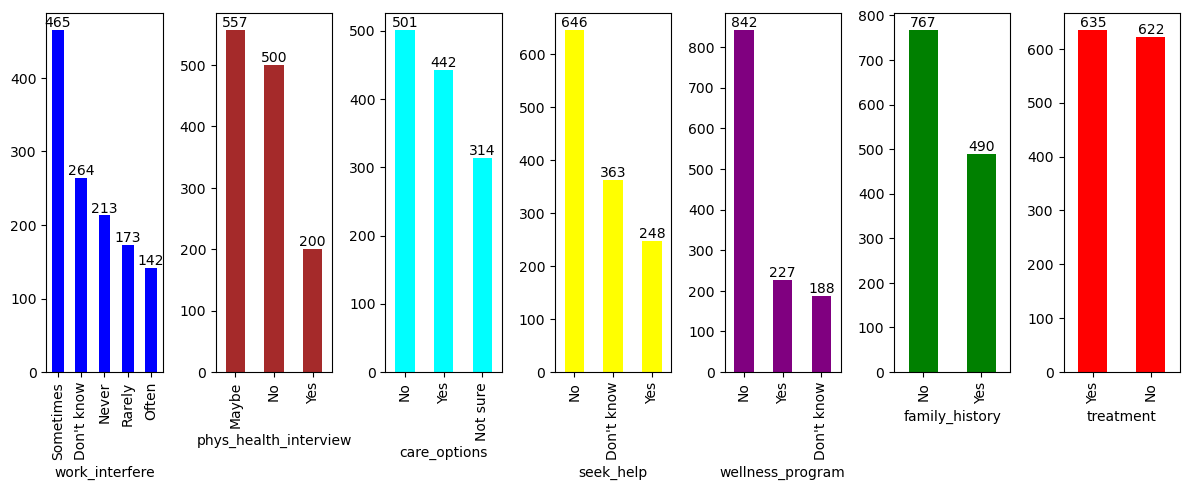

In [166]:
import matplotlib.pyplot as plt

# Create a figure and set of subplots
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(12, 5))

# Define a list of colors
colors = ['blue', 'brown', 'cyan','yellow','purple', 'green', 'red']

# Loop through each categorical variable and each subplot
for i, j in enumerate(categoricals):
    # Get the value counts of the categorical variable
    value_counts = df[j].value_counts()

    # Plot the bar chart with specific color from the colors list
    value_counts.plot(kind="bar", ax=axes[i], color=colors[i])
    
    # Add labels to the bars
    for container in axes[i].containers:
        axes[i].bar_label(container)

# Adjust layout to make sure everything fits without overlap
plt.tight_layout()
plt.show()

# Label Encoding

In [26]:
labelDict = {}
for feature in df:
    if feature == 'Age':
        continue  # Skip encoding for the quantitative 'Age' variable
    le = preprocessing.LabelEncoder()
    le.fit(df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df[feature] = le.transform(df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] = labelValue

for key, value in labelDict.items():
    print(key, value)

label_Gender ['female', 'male', 'trans']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['100-500', '25-Jun', '26-100', '5-Jan', '500-1000', 'More than 1000']
label_remote_work ['No', 'Yes']
label_tech_company ['No', 'Yes']
label_benefits ["Don't know", 'No', 'Yes']
label_care_options ['No', 'Not sure', 'Yes']
label_wellness_program ["Don't know", 'No', 'Yes']
label_seek_help ["Don't know", 'No', 'Yes']
label_anonymity ["Don't know", 'No', 'Yes']
label_leave ["Don't know", 'Somewhat difficult', 'Somewhat easy', 'Very difficult', 'Very easy']
label_mental_health_consequence ['Maybe', 'No', 'Yes']
label_phys_health_consequence ['Maybe', 'No', 'Yes']
label_coworkers ['No', 'Some of them', 'Yes']
label_supervisor ['No', 'Some of them', 'Yes']
label_mental_health_interview ['Maybe', 'No', 'Yes']
label_phys_health_interview ['Maybe', 'No', 'Yes']

In [28]:
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,0,0,1,2,1,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,44,1,0,0,0,3,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,0,0,0,3,1,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,31,1,0,1,1,2,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,31,1,0,0,0,1,0,1,1,2,...,0,0,1,1,1,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,0,0,1,0,2,0,1,1,...,0,2,1,1,1,1,1,1,0,0
1255,32,1,0,1,1,2,2,1,1,2,...,2,1,1,1,1,2,1,1,2,0
1256,34,1,0,1,1,4,5,0,1,2,...,0,1,2,2,0,0,1,1,1,0
1257,46,0,0,0,0,0,0,1,1,1,...,0,0,2,1,0,0,1,1,1,0


# Final check for missing values

In [338]:
missing_total = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_total, missing_percent], axis=1, keys=['Total', 'Percent'])
print("\n missing values:")
print(missing_data)


 missing values:
                           Total  Percent
Age                            0      0.0
seek_help                      0      0.0
mental_vs_physical             0      0.0
phys_health_interview          0      0.0
mental_health_interview        0      0.0
supervisor                     0      0.0
coworkers                      0      0.0
phys_health_consequence        0      0.0
mental_health_consequence      0      0.0
leave                          0      0.0
anonymity                      0      0.0
wellness_program               0      0.0
Gender                         0      0.0
care_options                   0      0.0
benefits                       0      0.0
tech_company                   0      0.0
remote_work                    0      0.0
no_employees                   0      0.0
work_interfere                 0      0.0
treatment                      0      0.0
family_history                 0      0.0
self_employed                  0      0.0
obs_consequence 

# Segregate Dataset into X (features) & y (target)

In [340]:
# Features
X =df.drop(columns=['treatment'])  # Exclude the target column
# Target variable (target)
y = df['treatment']

# Splitting Dataset into Train & Test

In [343]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

# Feature Scaling

In [346]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Deployment with Hyperparameter Tuning

In [348]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
from catboost import CatBoostClassifier

SEED = 42  # Set your random seed here

# Expanded hyperparameter grids
model_params = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, random_state=SEED, solver='liblinear'),
        "params": {
            "C": [0.01, 0.1],
            "penalty": ["l1", "l2"],
            "fit_intercept": [True, False],
            "class_weight": [None, "balanced"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=SEED),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [3, 5],
            "min_samples_split": [3, 5],
            "min_samples_leaf": [3, 5]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=SEED),
        "params": {
            "n_estimators": [200, 300],
            "learning_rate": [0.001, 0.01],
            "max_depth": [3, 5],
            "min_samples_split": [3, 5],
            "min_samples_leaf": [2, 4],
            "max_features": ["sqrt", "log2", None]
        }
    },
    "Categorical Boosting": {
        "model": CatBoostClassifier(verbose=0, random_state=SEED),
        "params": {
            "iterations": [200, 300],
            "learning_rate": [0.001, 0.01],
            "depth": [3, 5],
            "l2_leaf_reg": [3, 5],
            "bagging_temperature": [ 1, 2]
        }
    },
    "SVM": {
        "model": SVC(probability=True, random_state=SEED),
        "params": {
            "C": [0.001,0.01, 0.1],
            "kernel": ["rbf", "linear", "poly"],
            "gamma": ["scale", "auto"],
            "class_weight": [None, "balanced"]
        }
    },
    "Neural Network": {
        "model": MLPClassifier(max_iter=1000, random_state=SEED),
        "params": {
            "hidden_layer_sizes": [(50,50), (100,)],
            "activation": ['relu', 'tanh', 'logistic'],
            "solver": ['adam', 'lbfgs'],
            "alpha": [0.0001, 0.001],
            "learning_rate": ['constant', 'adaptive'],
            "early_stopping": [True, False]
        }
    }
}

results = []

for name, mp in model_params.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(mp["model"], mp["params"], cv=5, n_jobs=-1, scoring='roc_auc', verbose=1)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    print(f"Best params for {name}: {grid.best_params_}")

    y_pred_train = best_model.predict(X_train_scaled)
    y_pred_test = best_model.predict(X_test_scaled)

    train_acc = round(accuracy_score(y_train, y_pred_train), 4)
    test_acc = round(accuracy_score(y_test, y_pred_test), 4)
    train_precision = round(precision_score(y_train, y_pred_train, average='binary'), 4)
    test_precision = round(precision_score(y_test, y_pred_test, average='binary'), 4)
    train_recall = round(recall_score(y_train, y_pred_train, average='binary'), 4)
    test_recall = round(recall_score(y_test, y_pred_test, average='binary'), 4)
    train_f1 = round(f1_score(y_train, y_pred_train, average='binary'), 4)
    test_f1 = round(f1_score(y_test, y_pred_test, average='binary'), 4)

    try:
        auc_train = round(roc_auc_score(y_train, best_model.predict_proba(X_train_scaled)[:, 1]), 4)
        auc_test = round(roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1]), 4)
    except:
        auc_train = auc_test = None

    results.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Train Precision": train_precision,
        "Test Precision": test_precision,
        "Train Recall": train_recall,
        "Test Recall": test_recall,
        "Train F1": train_f1,
        "Test F1": test_f1,
        "Train AUC": auc_train,
        "Test AUC": auc_test
    })

results_df = pd.DataFrame(results)
results_df

Tuning Logistic Regression...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best params for Logistic Regression: {'C': 0.01, 'class_weight': None, 'fit_intercept': False, 'penalty': 'l2'}
Tuning Random Forest...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best params for Random Forest: {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}
Tuning Gradient Boosting...
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best params for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 300}
Tuning Categorical Boosting...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best params for Categorical Boosting: {'bagging_temperature': 1, 'depth': 5, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.01}
Tuning SVM...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best params for SVM: {'C': 0.001,

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1,Train AUC,Test AUC
0,Logistic Regression,0.8149,0.8175,0.7940,0.8286,0.8451,0.8406,0.8187,0.8345,0.8870,0.8874
1,Random Forest,0.8557,0.8214,0.8066,0.8252,0.9316,0.8551,0.8646,0.8399,0.9363,0.9020
2,Gradient Boosting,0.8876,0.8373,0.8466,0.8540,0.9437,0.8478,0.8925,0.8509,0.9656,0.9031
3,Categorical Boosting,0.8438,0.8373,0.7787,0.8089,0.9557,0.9203,0.8582,0.8610,0.9484,0.9047
4,SVM,0.8149,0.8135,0.7940,0.8321,0.8451,0.8261,0.8187,0.8291,0.8823,0.8899
5,Neural Network,0.8139,0.8016,0.7958,0.8235,0.8390,0.8116,0.8168,0.8175,0.8883,0.8832


Fitting Logistic Regression...
Fitting Random Forest...
Fitting Gradient Boosting...
Fitting Categorical Boosting...
Fitting SVM...
Fitting Neural Network...

ROC AUC Scores (Test Set):
Logistic Regression: 0.8874
Random Forest: 0.9020
Gradient Boosting: 0.9031
Categorical Boosting: 0.9047
SVM: 0.8899
Neural Network: 0.8832


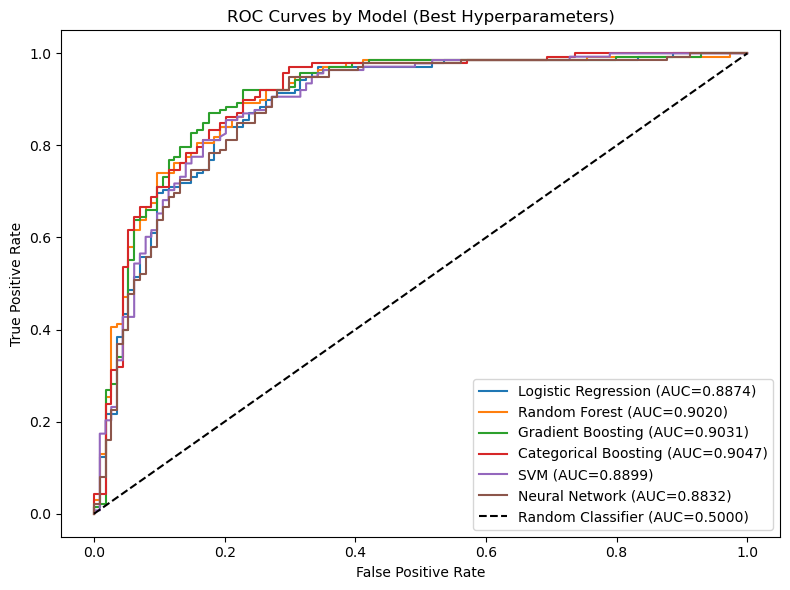

In [352]:
import matplotlib.pyplot as plt

SEED = 42  # For reproducibility

# Instantiate models with your best-found parameters
best_models = {
    "Logistic Regression": LogisticRegression(
        C=0.01, class_weight=None, fit_intercept=False, penalty='l2',
        max_iter=1000, random_state=SEED, solver='liblinear'
    ),
    "Random Forest": RandomForestClassifier(
         max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100, random_state=SEED
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        learning_rate=0.01, max_depth=5, max_features='sqrt', min_samples_leaf=2,
        min_samples_split=3, n_estimators=300, random_state=SEED
    ),
    "Categorical Boosting": CatBoostClassifier(
        bagging_temperature=1, depth=5, iterations=300, l2_leaf_reg=3,
        learning_rate=0.01, verbose=0, random_state=SEED
    ),
    "SVM": SVC(
        C=0.001, class_weight=None, gamma='scale', kernel='linear',
        probability=True, random_state=SEED
    ),
    "Neural Network": MLPClassifier(
        activation='logistic', alpha=0.001, early_stopping=False, hidden_layer_sizes=(50, 50),
        learning_rate='constant', solver='adam', max_iter=1000, random_state=SEED
    )
}

results = []

for name, model in best_models.items():
    print(f"Fitting {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

# --- ROC curve and AUC plotting ---
plt.figure(figsize=(8, 6))
roc_auc_results = []

for name, model in best_models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = model.decision_function(X_test_scaled)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_test = roc_auc_score(y_test, y_proba)
    roc_auc_results.append((name, auc_test))
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_test:.4f})")

print("\nROC AUC Scores (Test Set):")
for name, auc_val in roc_auc_results:
    print(f"{name}: {auc_val:.4f}")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC=0.5000)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves by Model (Best Hyperparameters)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# SHAP for Categorical Boosting

In [366]:
model_catb = CatBoostClassifier()
model_catb.fit(X_train_scaled, y_train)

Learning rate set to 0.010324
0:	learn: 0.6862165	total: 3.21ms	remaining: 3.21s
1:	learn: 0.6783588	total: 5.71ms	remaining: 2.85s
2:	learn: 0.6707356	total: 8.15ms	remaining: 2.71s
3:	learn: 0.6644870	total: 9.64ms	remaining: 2.4s
4:	learn: 0.6577652	total: 12.5ms	remaining: 2.49s
5:	learn: 0.6519724	total: 14.5ms	remaining: 2.4s
6:	learn: 0.6451924	total: 19ms	remaining: 2.69s
7:	learn: 0.6389163	total: 21.8ms	remaining: 2.7s
8:	learn: 0.6320250	total: 24.1ms	remaining: 2.65s
9:	learn: 0.6254485	total: 27ms	remaining: 2.67s
10:	learn: 0.6195146	total: 30.5ms	remaining: 2.74s
11:	learn: 0.6132366	total: 32.8ms	remaining: 2.7s
12:	learn: 0.6075433	total: 34.8ms	remaining: 2.64s
13:	learn: 0.6017864	total: 37.5ms	remaining: 2.64s
14:	learn: 0.5963364	total: 40.5ms	remaining: 2.66s
15:	learn: 0.5918043	total: 42.8ms	remaining: 2.63s
16:	learn: 0.5867263	total: 45.8ms	remaining: 2.65s
17:	learn: 0.5817612	total: 48.4ms	remaining: 2.64s
18:	learn: 0.5768354	total: 51.3ms	remaining: 2.65s


 98%|===================| 246/252 [00:36<00:00]        

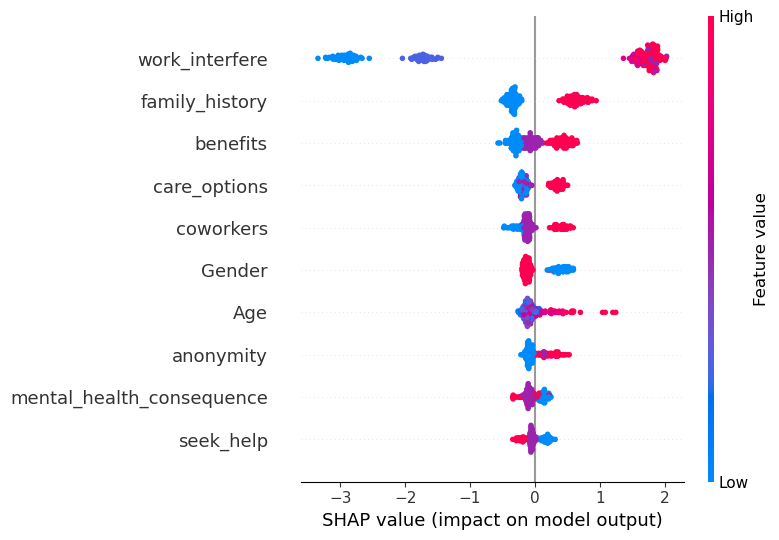

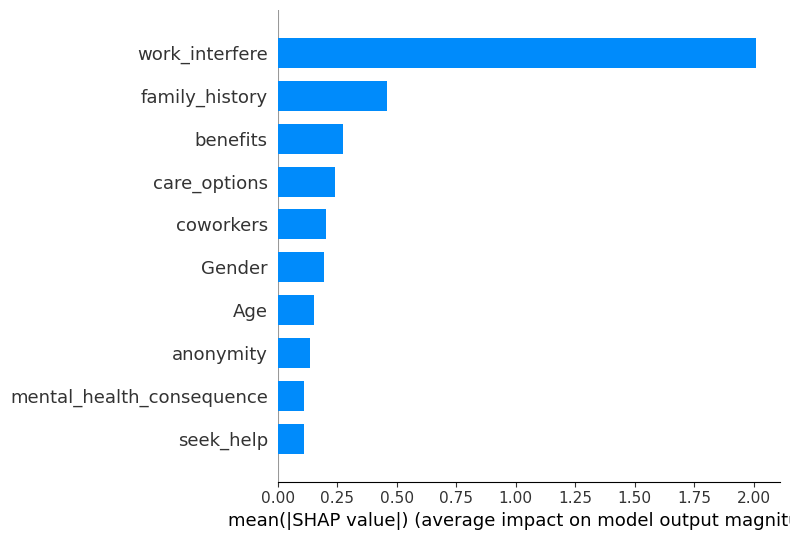

In [367]:
import shap
# SHAP explainer using TreeExplainer (best for tree-based models)
explainer = shap.Explainer(models["Categorical Boosting"], X_test_scaled)
shap_values = explainer(X_test_scaled,check_additivity=False)

# Beeswarm plot: only show top 10 features
shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns, max_display=10)

# Bar plot: only show top 10 features
shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns, plot_type="bar", max_display=10)

# Violin plot
#shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns, plot_type='violin', max_display=10)

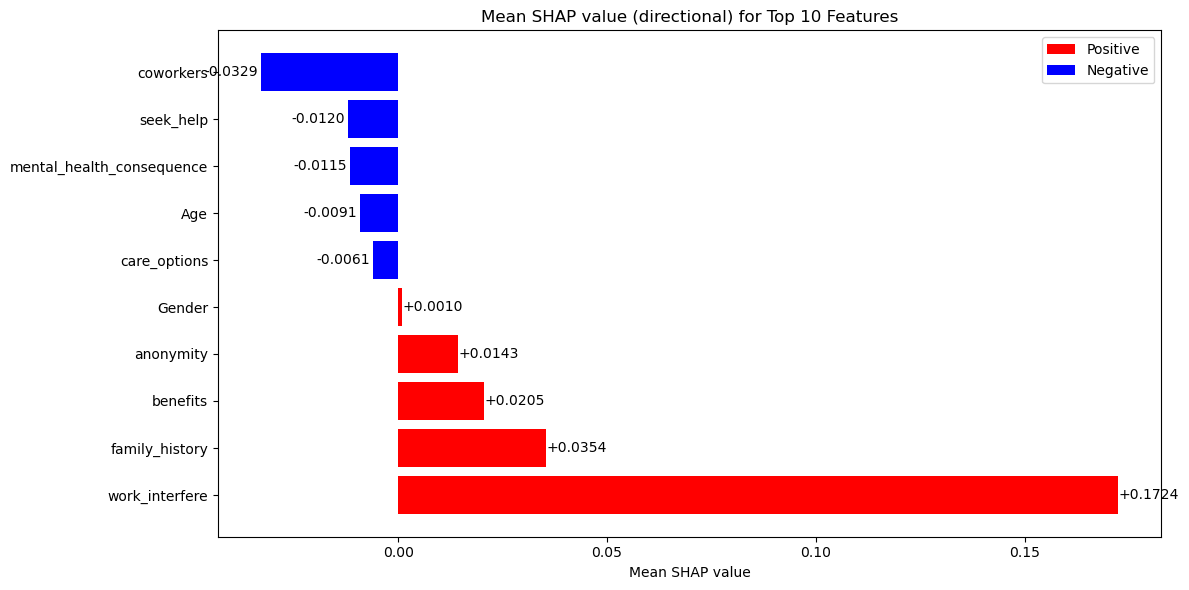

In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Compute mean SHAP value per feature, preserving sign
mean_shap = pd.DataFrame(shap_values.values, columns=X_test.columns).mean(axis=0)
# Compute mean absolute SHAP value per feature (for ordering)
mean_abs_shap = pd.DataFrame(np.abs(shap_values.values), columns=X_test.columns).mean(axis=0)
# Take top 10 features by mean absolute value
top_features = mean_abs_shap.sort_values(ascending=False).head(10).index

# Prepare dataframe for plotting
plot_df = pd.DataFrame({
    'feature': top_features,
    'mean_shap': mean_shap[top_features]
}).sort_values('mean_shap', ascending=False)

# Assign color based on positive or negative impact
colors = ['red' if val > 0 else 'blue' for val in plot_df['mean_shap']]

# Plot
plt.figure(figsize=(12, 6))
bars = plt.barh(plot_df['feature'], plot_df['mean_shap'], color=colors)
plt.xlabel("Mean SHAP value")
plt.title("Mean SHAP value (directional) for Top 10 Features")

# Add value labels on bars
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + (0.0001 if xval > 0 else -0.0007), bar.get_y() + bar.get_height()/2, 
             f"{xval:+.4f}", va='center', ha='left' if xval > 0 else 'right', fontsize=10)

# Custom legend
plt.legend([bars[0], bars[-1]], ['Positive', 'Negative'], loc='upper right')
plt.tight_layout()
plt.show()

# SHAP for Gradient Boosting

In [372]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

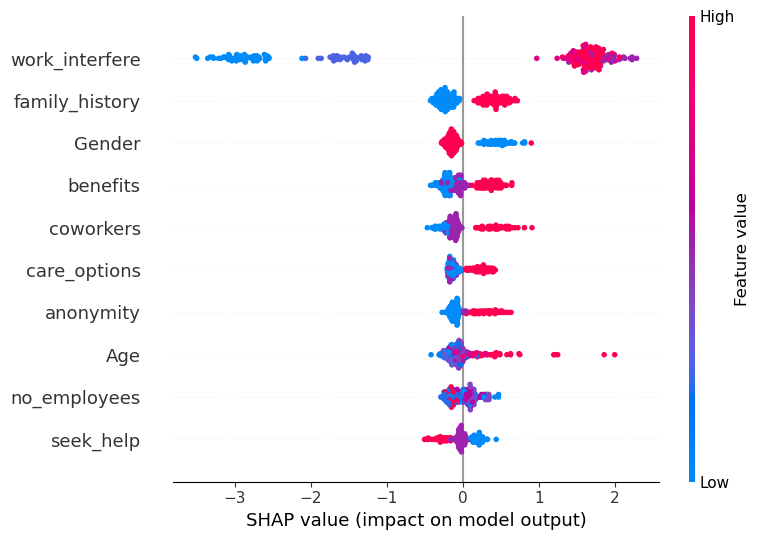

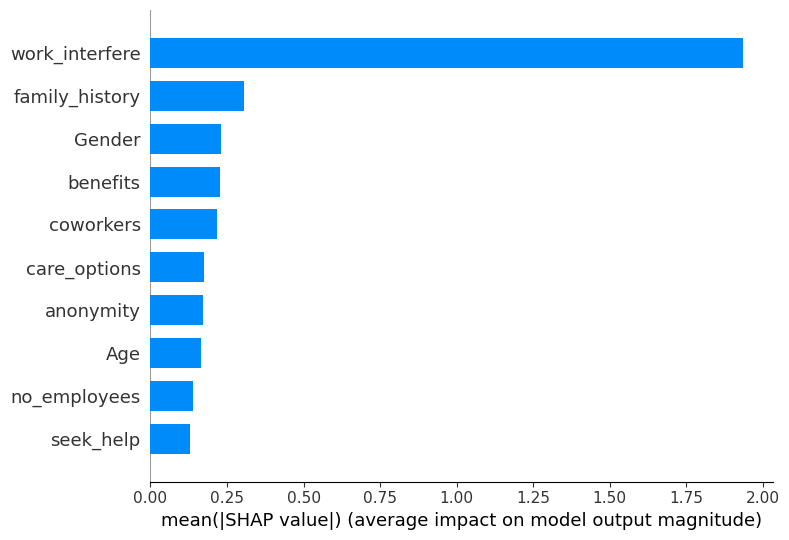

In [374]:
import shap

# SHAP explainer using TreeExplainer (best for tree-based models)
explainer = shap.Explainer(models["Gradient Boosting"], X_test_scaled)
shap_values = explainer(X_test_scaled,check_additivity=False)

# Beeswarm plot: only show top 10 features
shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns, max_display=10)

# Bar plot: only show top 10 features
shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns, plot_type="bar", max_display=10)

# Violin plot
#shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns, plot_type='violin', max_display=10)

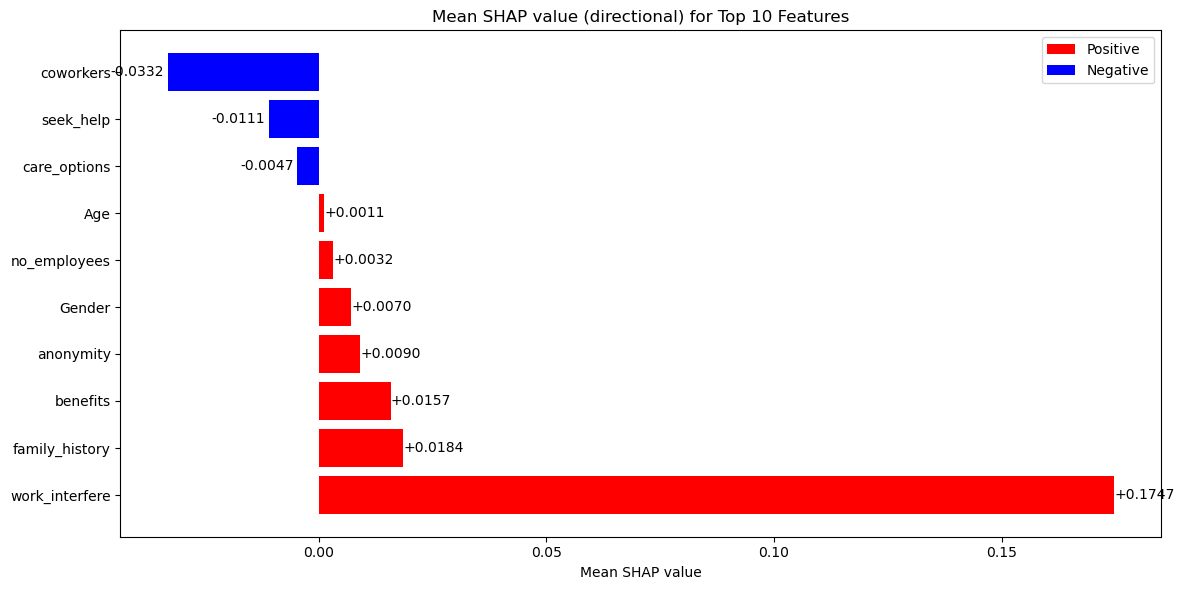

In [375]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Compute mean SHAP value per feature, preserving sign
mean_shap = pd.DataFrame(shap_values.values, columns=X_test.columns).mean(axis=0)
# Compute mean absolute SHAP value per feature (for ordering)
mean_abs_shap = pd.DataFrame(np.abs(shap_values.values), columns=X_test.columns).mean(axis=0)
# Take top 10 features by mean absolute value
top_features = mean_abs_shap.sort_values(ascending=False).head(10).index

# Prepare dataframe for plotting
plot_df = pd.DataFrame({
    'feature': top_features,
    'mean_shap': mean_shap[top_features]
}).sort_values('mean_shap', ascending=False)

# Assign color based on positive or negative impact
colors = ['red' if val > 0 else 'blue' for val in plot_df['mean_shap']]

# Plot
plt.figure(figsize=(12, 6))
bars = plt.barh(plot_df['feature'], plot_df['mean_shap'], color=colors)
plt.xlabel("Mean SHAP value")
plt.title("Mean SHAP value (directional) for Top 10 Features")

# Add value labels on bars
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + (0.0001 if xval > 0 else -0.0007), bar.get_y() + bar.get_height()/2, 
             f"{xval:+.4f}", va='center', ha='left' if xval > 0 else 'right', fontsize=10)

# Custom legend
plt.legend([bars[0], bars[-1]], ['Positive', 'Negative'], loc='upper right')
plt.tight_layout()
plt.show()

# Deployment with only the most Influential Features from the two best models

In [382]:
data = ['work_interfere', 'family_history', 'Gender','benefits','coworkers', 'care_options', 'anonymity', 'Age', 'no_employees', 'seek_help','mental_health_consequence']
X = df[data]
y = df.treatment

,work_interfere,family_history,Gender,benefits,coworkers,care_options,anonymity,Age,no_employees,seek_help,mental_health_consequence
0,2,0,0,2,1,1,2,37,1,2,1
1,3,0,1,0,0,0,0,44,5,0,0
2,3,0,1,1,2,0,0,32,1,1,1
3,2,1,1,1,1,2,1,31,2,1,2
4,1,0,1,2,1,0,0,31,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1254,0,0,1,1,1,0,0,26,2,1,1
1255,2,1,1,2,1,2,2,32,2,1,1
1256,4,1,1,2,0,2,0,34,5,1,2
1257,0,0,0,1,0,2,0,46,0,1,2


In [386]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

In [388]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [390]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
from catboost import CatBoostClassifier

SEED = 42  # Set your random seed here

# Expanded hyperparameter grids
model_params = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, random_state=SEED, solver='liblinear'),
        "params": {
            "C": [0.01, 0.1],
            "penalty": ["l1", "l2"],
            "fit_intercept": [True, False],
            "class_weight": [None, "balanced"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=SEED),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [3, 5],
            "min_samples_split": [3, 5],
            "min_samples_leaf": [3, 5]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=SEED),
        "params": {
            "n_estimators": [200, 300],
            "learning_rate": [0.001, 0.01],
            "max_depth": [3, 5],
            "min_samples_split": [3, 5],
            "min_samples_leaf": [2, 4],
            "max_features": ["sqrt", "log2", None]
        }
    },
    "Categorical Boosting": {
        "model": CatBoostClassifier(verbose=0, random_state=SEED),
        "params": {
            "iterations": [200, 300],
            "learning_rate": [0.001, 0.01],
            "depth": [3, 5],
            "l2_leaf_reg": [3, 5],
            "bagging_temperature": [ 1, 2]
        }
    },
    "SVM": {
        "model": SVC(probability=True, random_state=SEED),
        "params": {
            "C": [0.001,0.01, 0.1],
            "kernel": ["rbf", "linear", "poly"],
            "gamma": ["scale", "auto"],
            "class_weight": [None, "balanced"]
        }
    },
    "Neural Network": {
        "model": MLPClassifier(max_iter=1000, random_state=SEED),
        "params": {
            "hidden_layer_sizes": [(50,50), (100,)],
            "activation": ['relu', 'tanh', 'logistic'],
            "solver": ['adam', 'lbfgs'],
            "alpha": [0.0001, 0.001],
            "learning_rate": ['constant', 'adaptive'],
            "early_stopping": [True, False]
        }
    }
}

results = []

for name, mp in model_params.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(mp["model"], mp["params"], cv=5, n_jobs=-1, scoring='roc_auc', verbose=1)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    print(f"Best params for {name}: {grid.best_params_}")

    y_pred_train = best_model.predict(X_train_scaled)
    y_pred_test = best_model.predict(X_test_scaled)

    train_acc = round(accuracy_score(y_train, y_pred_train), 4)
    test_acc = round(accuracy_score(y_test, y_pred_test), 4)
    train_precision = round(precision_score(y_train, y_pred_train, average='binary'), 4)
    test_precision = round(precision_score(y_test, y_pred_test, average='binary'), 4)
    train_recall = round(recall_score(y_train, y_pred_train, average='binary'), 4)
    test_recall = round(recall_score(y_test, y_pred_test, average='binary'), 4)
    train_f1 = round(f1_score(y_train, y_pred_train, average='binary'), 4)
    test_f1 = round(f1_score(y_test, y_pred_test, average='binary'), 4)

    try:
        auc_train = round(roc_auc_score(y_train, best_model.predict_proba(X_train_scaled)[:, 1]), 4)
        auc_test = round(roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1]), 4)
    except:
        auc_train = auc_test = None

    results.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Train Precision": train_precision,
        "Test Precision": test_precision,
        "Train Recall": train_recall,
        "Test Recall": test_recall,
        "Train F1": train_f1,
        "Test F1": test_f1,
        "Train AUC": auc_train,
        "Test AUC": auc_test
    })

results_df = pd.DataFrame(results)
results_df

Tuning Logistic Regression...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best params for Logistic Regression: {'C': 0.01, 'class_weight': 'balanced', 'fit_intercept': True, 'penalty': 'l2'}
Tuning Random Forest...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best params for Random Forest: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 200}
Tuning Gradient Boosting...
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best params for Gradient Boosting: {'learning_rate': 0.001, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Tuning Categorical Boosting...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best params for Categorical Boosting: {'bagging_temperature': 1, 'depth': 5, 'iterations': 300, 'l2_leaf_reg': 5, 'learning_rate': 0.01}
Tuning SVM...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best params for SVM: {'C': 

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1,Train AUC,Test AUC
0,Logistic Regression,0.8129,0.8095,0.7877,0.8261,0.8511,0.8261,0.8182,0.8261,0.8829,0.8867
1,Random Forest,0.8448,0.8333,0.7925,0.8243,0.9296,0.8841,0.8556,0.8531,0.9291,0.9066
2,Gradient Boosting,0.8527,0.8254,0.8144,0.8357,0.9095,0.8478,0.8593,0.8417,0.9358,0.9070
3,Categorical Boosting,0.8507,0.8452,0.7926,0.8278,0.9457,0.9058,0.8624,0.8651,0.9389,0.9101
4,SVM,0.8109,0.8135,0.7806,0.8273,0.8592,0.8333,0.8180,0.8303,0.8804,0.8851
5,Neural Network,0.8577,0.7976,0.8052,0.8129,0.9396,0.8188,0.8672,0.8159,0.9475,0.8764


Fitting Logistic Regression...
Fitting Random Forest...
Fitting Gradient Boosting...
Fitting Categorical Boosting...
Fitting SVM...
Fitting Neural Network...

ROC AUC Scores (Test Set):
Logistic Regression: 0.8867
Random Forest: 0.9066
Gradient Boosting: 0.9070
Categorical Boosting: 0.9101
SVM: 0.8851
Neural Network: 0.8764


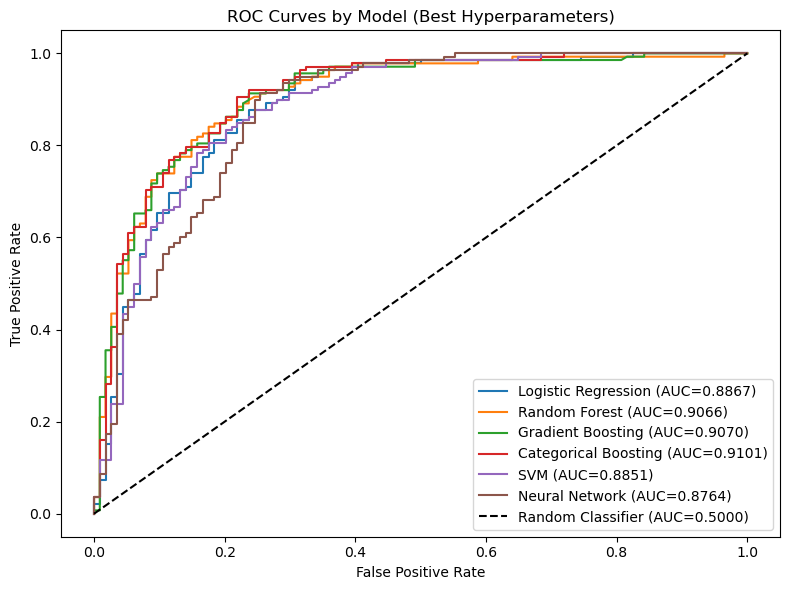

In [396]:
import matplotlib.pyplot as plt

SEED = 42  # For reproducibility

# Instantiate models with your best-found parameters
best_models = {
    "Logistic Regression": LogisticRegression(
        C=0.01, class_weight='balanced', fit_intercept=True, penalty='l2',
        max_iter=1000, random_state=SEED, solver='liblinear'
    ),
    "Random Forest": RandomForestClassifier(
         max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=200, random_state=SEED
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        learning_rate=0.001, max_depth=5, max_features='sqrt', min_samples_leaf=2,
        min_samples_split=5, n_estimators=200, random_state=SEED
    ),
    "Categorical Boosting": CatBoostClassifier(
        bagging_temperature=1, depth=5, iterations=300, l2_leaf_reg=5,
        learning_rate=0.01, verbose=0, random_state=SEED
    ),
    "SVM": SVC(
        C=0.001, class_weight='balanced', gamma='scale', kernel='linear',
        probability=True, random_state=SEED
    ),
    "Neural Network": MLPClassifier(
        activation='relu', alpha=0.0001, early_stopping=False, hidden_layer_sizes=(100,),
        learning_rate='constant', solver='adam', max_iter=1000, random_state=SEED
    )
}

results = []

for name, model in best_models.items():
    print(f"Fitting {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

# --- ROC curve and AUC plotting ---
plt.figure(figsize=(8, 6))
roc_auc_results = []

for name, model in best_models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = model.decision_function(X_test_scaled)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_test = roc_auc_score(y_test, y_proba)
    roc_auc_results.append((name, auc_test))
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_test:.4f})")

print("\nROC AUC Scores (Test Set):")
for name, auc_val in roc_auc_results:
    print(f"{name}: {auc_val:.4f}")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC=0.5000)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves by Model (Best Hyperparameters)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Performance Evaluation Plot for all Features 

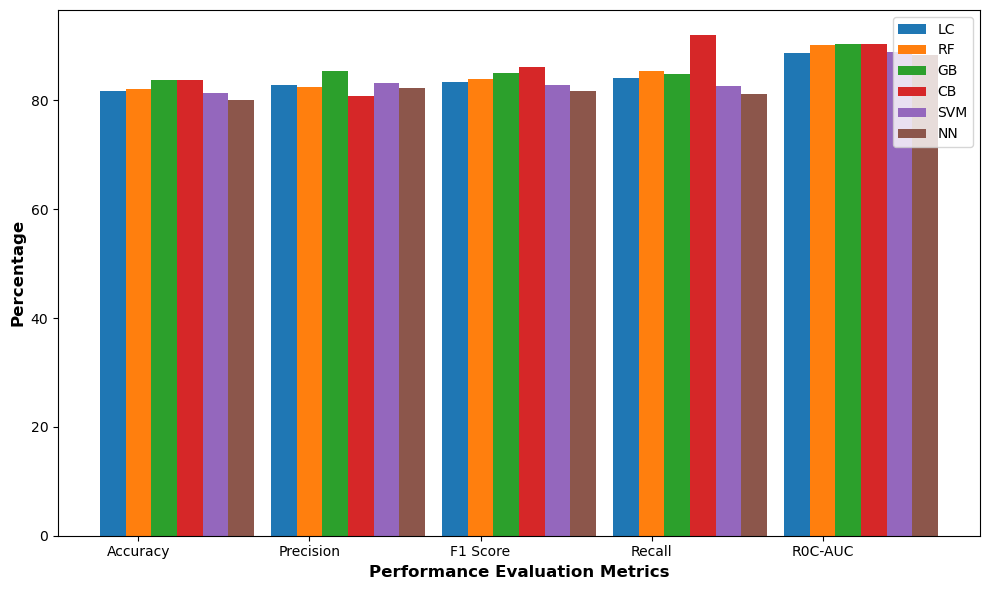

In [407]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Models': ['LC', 'RF', 'GB','CB','SVM','NN'],
    'Accuracy': [81.75, 82.14, 83.73,83.73,81.35,80.16],
    'Precision': [82.86,82.52, 85.40,80.89,83.21,82.35],
    'Recall': [84.06, 85.51, 84.78,92.03,82.61,81.16],
    'F1 Score': [83.45, 83.99, 85.09,86.10,82.91,81.75],
    'R0C-AUC': [88.74, 90.20, 90.31,90.47,88.99,88.32]
}

df = pd.DataFrame(data)


# Selecting the columns to plot
metrics_to_plot = ['Accuracy', 'Precision', 'F1 Score','Recall','R0C-AUC']
models = df['Models']
values = df[metrics_to_plot]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))


# Set the position of the bars on the x-axis
bar_positions = list(range(len(metrics_to_plot)))

# The width of a bar
bar_width = 0.15

# Setting the position of the grouped bars
model_positions = [bar_positions]
for i in range(1, len(models)):
    model_positions.append([x + bar_width for x in model_positions[i-1]])

# Plotting each set of bars for each model
for i, model in enumerate(models):
    plt.bar(model_positions[i], df.loc[df['Models'] == model, metrics_to_plot].values.flatten(),
            width=bar_width, label=model)

# Adding labels and title
plt.xlabel('Performance Evaluation Metrics', fontweight='bold', fontsize=12)
plt.ylabel('Percentage', fontweight='bold', fontsize=12)
#plt.title('Comparison of the Methods Based on the Metrics Considered')

# Adding the xticks, with a slight adjustment in position to centre them
plt.xticks([r + bar_width for r in range(len(metrics_to_plot))], metrics_to_plot)

# Adding the legend and showing the plot
plt.legend()
plt.tight_layout()
plt.show()

# Performance Evaluation Plot for SHAP selected Features 

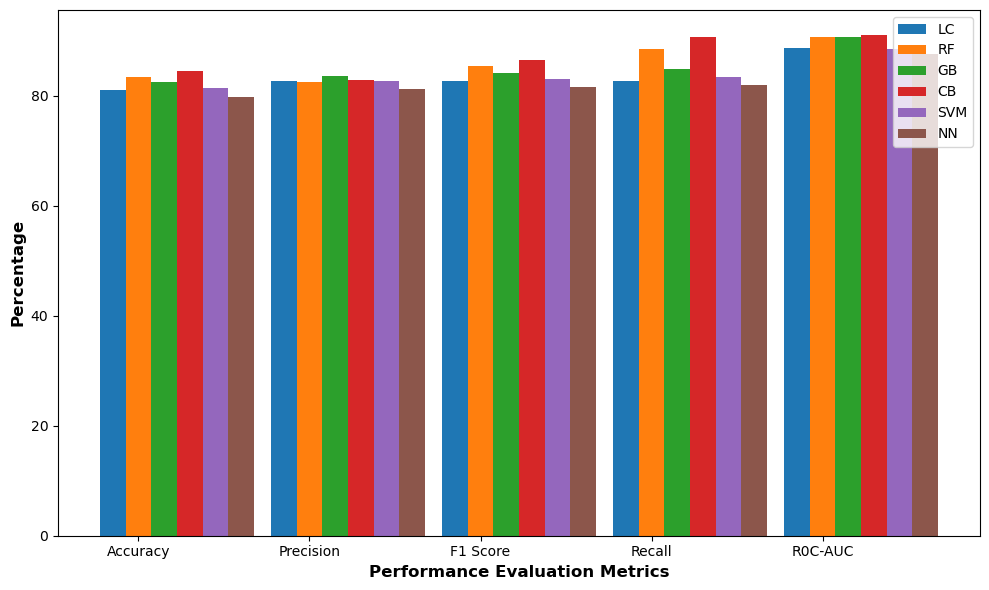

In [409]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Models': ['LC', 'RF', 'GB','CB','SVM','NN'],
    'Accuracy': [80.95, 83.33, 82.54,84.52,81.35,79.76],
    'Precision': [82.61,82.43, 83.57,82.78,82.73,81.29],
    'Recall': [82.61, 88.41, 84.78,90.58,83.33,81.88],
    'F1 Score': [82.61, 85.31, 84.17,86.51,83.03,81.59],
    'R0C-AUC': [88.67, 90.66, 90.70,91.01,88.51,87.64]
}

df = pd.DataFrame(data)


# Selecting the columns to plot
metrics_to_plot = ['Accuracy', 'Precision', 'F1 Score','Recall','R0C-AUC']
models = df['Models']
values = df[metrics_to_plot]


# Plotting
fig, ax = plt.subplots(figsize=(10, 6))


# Set the position of the bars on the x-axis
bar_positions = list(range(len(metrics_to_plot)))

# The width of a bar
bar_width = 0.15

# Setting the position of the grouped bars
model_positions = [bar_positions]
for i in range(1, len(models)):
    model_positions.append([x + bar_width for x in model_positions[i-1]])

# Plotting each set of bars for each model
for i, model in enumerate(models):
    plt.bar(model_positions[i], df.loc[df['Models'] == model, metrics_to_plot].values.flatten(),
            width=bar_width, label=model)

# Adding labels and title
plt.xlabel('Performance Evaluation Metrics', fontweight='bold', fontsize=12)
plt.ylabel('Percentage', fontweight='bold', fontsize=12)
#plt.title('Comparison of the Methods Based on the Metrics Considered')

# Adding the xticks, with a slight adjustment in position to centre them
plt.xticks([r + bar_width for r in range(len(metrics_to_plot))], metrics_to_plot)

# Adding the legend and showing the plot
plt.legend()
plt.tight_layout()
plt.show()